# **Proyek Analisis Data: Nama dataset**
* Nama : Evan Russel
* Email : evanrussel93@gmail.com
* Id Dicoding: evanrsl

## **Menentukan Pertanyaan Bisnis**
1. Category barang yang paling banyak dan paling sedikit dibeli?
2. Setiap bulan berapa penjualan tertinggi? 
3. Setiap tanggal berapa penjualan tertinggi? (apakah gajian faktor?)
4. Kapan terakhir pelanggan melakukan transaksi?
5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
6. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?


## **Menyiapkan semua library yang dibutuhkan**

In [98]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\olist_customers_dataset.csv
data\olist_geolocation_dataset.csv
data\olist_orders_dataset.csv
data\olist_order_items_dataset.csv
data\olist_order_payments_dataset.csv
data\olist_order_reviews_dataset.csv
data\olist_products_dataset.csv
data\olist_sellers_dataset.csv
data\product_category_name_translation.csv


## **Data Wrangling**

### Gathering Data

In [100]:
customer = pd.read_csv("data/olist_customers_dataset.csv")
print(customer.shape)
customer.head()

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [101]:
sellers = pd.read_csv("data/olist_sellers_dataset.csv")
print(sellers.shape)
sellers.head()

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [102]:
reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
print(reviews.shape)
reviews.head()

(99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [103]:
products = pd.read_csv("data/olist_products_dataset.csv")
print(products.shape)
products.head()

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [104]:
locations = pd.read_csv("data/olist_geolocation_dataset.csv")
print(locations.shape)
locations.head()

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [105]:
categories = pd.read_csv("data/product_category_name_translation.csv")
print(categories.shape)
categories.head()

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [106]:
orders = pd.read_csv("data/olist_orders_dataset.csv")
print(orders.shape)
orders.head()

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [107]:
payments = pd.read_csv("data/olist_order_payments_dataset.csv")
print(payments.shape)
payments.head()

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [108]:
order_items = pd.read_csv("data/olist_order_items_dataset.csv")
print(order_items.shape)
order_items.head()

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Menggabungkan table `order`dan `order_items`

In [109]:
df_orders = pd.merge(
    left=orders,
    right=order_items,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
print(df_orders.shape)
df_orders.head()

(113425, 14)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


#### Menggabungkan table `products`dan `categories`

In [110]:
df_products = pd.merge(
    left=products,
    right=categories,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
print(df_products.shape)
df_products.head()

(32951, 10)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


## Assessing Data

#### Menilai table `df_orders`

In [111]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   order_item_id                  112650 non-null  float64
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

In [112]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
dtype: int64

In [113]:
df_orders[df_orders['order_item_id'].isna()]['order_status'].value_counts()

unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: order_status, dtype: int64

ada 775 order yang gagal (bukan delivered) dengan status unavailable, canceled, created, invoiced, dan shipped. Dan 775 order ini menyebabkan data tidak memiliki order items

In [114]:
print("Jumlah duplikasi: ", df_orders.duplicated().sum())

Jumlah duplikasi:  0


#### Menilai table `df_products`

In [115]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.8+ MB


In [116]:
df_products.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

ada 610 product yang tidak memiliki category

In [117]:
df_products[df_products['product_category_name_english'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0,NaN
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0,NaN
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0,NaN
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0,NaN
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0,NaN
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0,NaN
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0,NaN
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0,NaN


In [118]:
df_products.loc[(df_products['product_category_name_english'].isnull()) & (df_products['product_category_name'].notnull())]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1628,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,NaN
5821,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
7325,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0,NaN
7478,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,NaN
8819,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0,NaN
11039,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,46.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
14266,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,59.0,927.0,1.0,10600.0,40.0,20.0,38.0,NaN
16182,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,58.0,792.0,4.0,750.0,30.0,30.0,30.0,NaN
16930,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0,NaN
17800,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0,NaN


ada 2 category yang tidak ada di table category english, yaitu pc_gamer dan portateis_cozinha_e_preparadores_de_alimentos 

In [119]:
print("Jumlah duplikasi: ", df_products.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

#### Cleaning `df_orders` table

In [120]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
dtype: int64

In [121]:
df_orders = df_orders.dropna(subset = ['order_item_id', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])
df_orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

In [122]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110180 entries, 0 to 113424
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110180 non-null  object 
 1   customer_id                    110180 non-null  object 
 2   order_status                   110180 non-null  object 
 3   order_purchase_timestamp       110180 non-null  object 
 4   order_approved_at              110180 non-null  object 
 5   order_delivered_carrier_date   110180 non-null  object 
 6   order_delivered_customer_date  110180 non-null  object 
 7   order_estimated_delivery_date  110180 non-null  object 
 8   order_item_id                  110180 non-null  float64
 9   product_id                     110180 non-null  object 
 10  seller_id                      110180 non-null  object 
 11  shipping_limit_date            110180 non-null  object 
 12  price                         

In [123]:
# membenarkan data types 
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])
df_orders['shipping_limit_date'] = pd.to_datetime(df_orders['shipping_limit_date'])
df_orders['order_status'] = df_orders['order_status'].astype('category')

df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110180 entries, 0 to 113424
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110180 non-null  object        
 1   customer_id                    110180 non-null  object        
 2   order_status                   110180 non-null  category      
 3   order_purchase_timestamp       110180 non-null  datetime64[ns]
 4   order_approved_at              110180 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110180 non-null  datetime64[ns]
 6   order_delivered_customer_date  110180 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110180 non-null  datetime64[ns]
 8   order_item_id                  110180 non-null  float64       
 9   product_id                     110180 non-null  object        
 10  seller_id                      110180 non-null  object        
 11  

In [124]:
df_orders['year'] = df_orders['order_purchase_timestamp'].dt.strftime('%Y')
df_orders['month'] = df_orders['order_purchase_timestamp'].dt.strftime('%m')
df_orders["date"] = df_orders["order_purchase_timestamp"].dt.strftime('%d')
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,year,month,date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017,10,02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,2018,07,24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,2018,08,08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,2017,11,18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,2018,02,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,2018,02,06
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,2017,08,27
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,2018,01,08
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,2018,01,08


#### Cleaning `df_products` table

In [125]:
df_products['product_category_name'].fillna('not defined', inplace=True)
df_products['product_category_name_english'].fillna('not defined', inplace=True)

df_products["product_category_name_english"] = np.where(df_products["product_category_name"] == 'pc_gamer', 'PC Gaming', df_products["product_category_name_english"])
df_products["product_category_name_english"] = np.where(df_products["product_category_name"] == 'portateis_cozinha_e_preparadores_de_alimentos', 'portable kitchen', df_products["product_category_name_english"])

In [126]:
df_products.isna().sum()

product_id                         0
product_category_name              0
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english      0
dtype: int64

In [127]:
df_products = df_products.drop(columns = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty'])
df_products.isna().sum()

product_id                       0
product_category_name            0
product_weight_g                 2
product_length_cm                2
product_height_cm                2
product_width_cm                 2
product_category_name_english    0
dtype: int64

In [128]:
df_products = df_products.dropna(subset=['product_weight_g'])
df_products.isna().sum()

product_id                       0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

#### Menggabungkan tabel `df_orders` dan `df_products`

In [129]:
df_orders_category = pd.merge(
    left = df_orders, 
    right = df_products, 
    left_on = 'product_id', 
    right_on = 'product_id', 
    how='left')
df_orders_category.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,year,month,date,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,8.72,2017,10,02,utilidades_domesticas,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,22.76,2018,07,24,perfumaria,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,19.22,2018,08,08,automotivo,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,2017,11,18,pet_shop,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,2018,02,13,papelaria,250.0,51.0,15.0,15.0,stationery


#### Cleaning `df_orders_category` table

In [130]:
df_orders_category = df_orders_category.dropna(subset=["product_category_name_english"])
df_orders_category

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,year,month,date,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,8.72,2017,10,02,utilidades_domesticas,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,22.76,2018,07,24,perfumaria,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,19.22,2018,08,08,automotivo,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,2017,11,18,pet_shop,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,2018,02,13,papelaria,250.0,51.0,15.0,15.0,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110175,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,20.10,2018,02,06,bebes,4950.0,40.0,10.0,40.0,baby
110176,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,65.02,2017,08,27,eletrodomesticos_2,13300.0,32.0,90.0,22.0,home_appliances_2
110177,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,40.59,2018,01,08,informatica_acessorios,6550.0,20.0,20.0,20.0,computers_accessories
110178,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,40.59,2018,01,08,informatica_acessorios,6550.0,20.0,20.0,20.0,computers_accessories


#### Menggabungkan tabel `df_orders_category` dan `customer`

In [131]:
all_df = pd.merge(
    left = df_orders_category,
    right = customer,
    left_on = 'customer_id',
    right_on = 'customer_id',
    how = 'left')
all_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,perfumaria,400.0,19.0,13.0,19.0,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,automotivo,420.0,24.0,19.0,21.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,pet_shop,450.0,30.0,10.0,20.0,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,papelaria,250.0,51.0,15.0,15.0,stationery,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110157,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,bebes,4950.0,40.0,10.0,40.0,baby,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
110158,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,eletrodomesticos_2,13300.0,32.0,90.0,22.0,home_appliances_2,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
110159,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,informatica_acessorios,6550.0,20.0,20.0,20.0,computers_accessories,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ
110160,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,informatica_acessorios,6550.0,20.0,20.0,20.0,computers_accessories,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [132]:
all_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
year                             0
month                            0
date                             0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [133]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110162 entries, 0 to 110161
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110162 non-null  object        
 1   customer_id                    110162 non-null  object        
 2   order_status                   110162 non-null  category      
 3   order_purchase_timestamp       110162 non-null  datetime64[ns]
 4   order_approved_at              110162 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110162 non-null  datetime64[ns]
 6   order_delivered_customer_date  110162 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110162 non-null  datetime64[ns]
 8   order_item_id                  110162 non-null  float64       
 9   product_id                     110162 non-null  object        
 10  seller_id                      110162 non-null  object        
 11  

In [134]:
all_df.to_csv('all.csv', index=False)

#### membuat `df_rfm` table untuk RFM Analysis

In [135]:
df_rfm = all_df[['customer_unique_id', 'price', 'customer_city', 'customer_state', 'product_category_name_english','order_purchase_timestamp',]]

In [136]:
df_rfm['order_purchase_timestamp'] = pd.to_datetime(df_rfm['order_purchase_timestamp'])
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110162 entries, 0 to 110161
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             110162 non-null  object        
 1   price                          110162 non-null  float64       
 2   customer_city                  110162 non-null  object        
 3   customer_state                 110162 non-null  object        
 4   product_category_name_english  110162 non-null  object        
 5   order_purchase_timestamp       110162 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 5.9+ MB


<ipython-input-136-bc8a9ad0b9c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['order_purchase_timestamp'] = pd.to_datetime(df_rfm['order_purchase_timestamp'])


# **Exploratory Data Analysis (EDA)**

In [137]:
category_rank = df_orders_category[['product_category_name_english']].value_counts().reset_index()
category_rank.columns = ['category', 'count']
category_rank

,category,count
0,bed_bath_table,10952
1,health_beauty,9467
2,sports_leisure,8429
3,furniture_decor,8156
4,computers_accessories,7643
...,...,...
69,portable kitchen,14
70,la_cuisine,14
71,PC Gaming,8
72,fashion_childrens_clothes,7


In [138]:
df_orders = df_orders.loc[((df_orders['order_purchase_timestamp'] > '2016-10-01') & (df_orders['order_purchase_timestamp'] <= '2018-09-30'))].sort_values(by='order_purchase_timestamp')

In [139]:
month_rank = df_orders[['month']].value_counts().reset_index()
month_rank.columns = ['month', 'count']
month_rank

,month,count
0,08,11939
1,05,11813
2,07,11376
3,03,10914
4,06,10496
5,04,10396
6,02,9364
7,01,8948
8,11,8474
9,12,6188


In [140]:
date_rank = df_orders[['date']].value_counts().reset_index()
date_rank.columns = ['date', 'count']
date_rank

,date,count
0,24,4309
1,16,3983
2,15,3849
3,05,3836
4,06,3823
5,18,3809
6,19,3795
7,04,3776
8,14,3725
9,26,3708


# **Visualization & Explanatory Analysis**

#### Pertanyaan 1:
Category barang yang paling banyak dan paling sedikit dibeli?

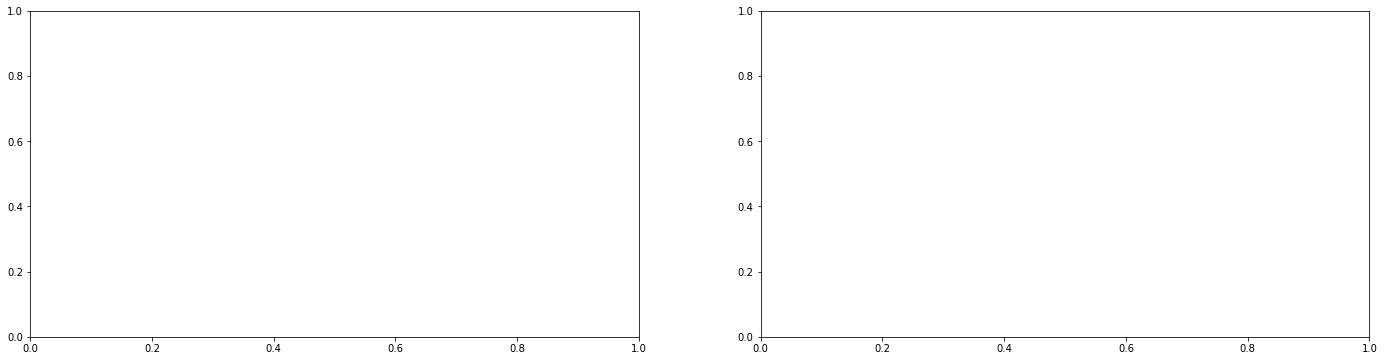

In [141]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

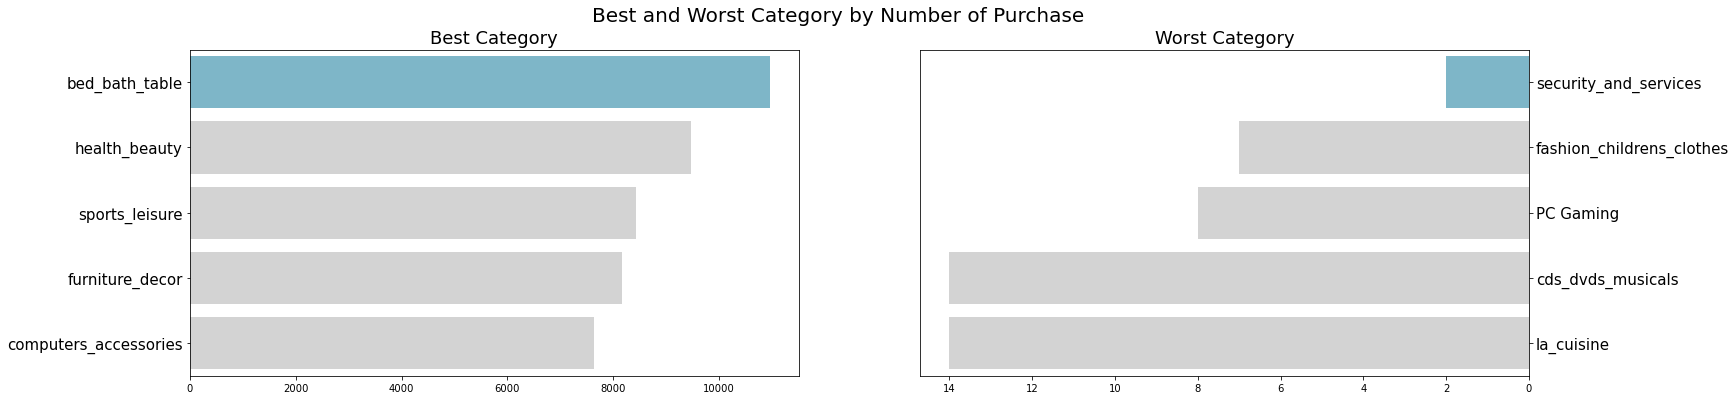

In [142]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="count", y="category", data=category_rank.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Category", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="count", y="category", data=category_rank.sort_values(by="count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Category", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Category by Number of Purchase", fontsize=20)
plt.show()

Category paling banyak dibeli adalah bed bath table diikuti oleh health beauty
Category paling sedikit dibeli adalah security and services diikuti oleh fashion childrens clothes

#### Pertanyaan 2:
Setiap bulan berapa penjualan tertinggi? 

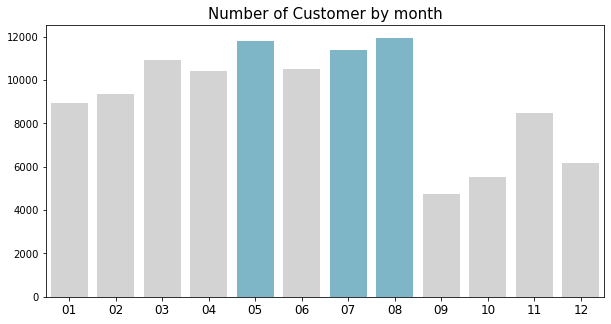

In [143]:
plt.figure(figsize=(10, 5))

colors = ["#72BCD4" if i == 7 or i == 4 or i == 6 else "#D3D3D3" for i in range(9)]
sns.barplot(
    y="count", 
    x="month",
    data=month_rank.sort_values(by="month", ascending=True),
    palette=colors
    
)
plt.title("Number of Customer by month", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Penjualan tertinggi di bulan agustus diikuti oleh bulan mei. Sedangkan penjualan terendah di bulan september, tepat setelah penjualan tertinggi di bulan agustus

#### Pertanyaan 3:
Setiap tanggal berapa penjualan tertinggi? (apakah gajian faktor?)

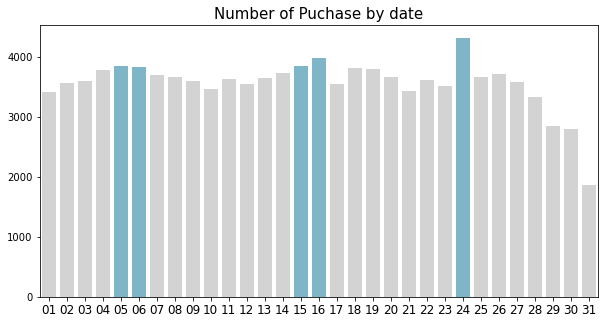

In [144]:
plt.figure(figsize=(10, 5))

colors = ["#72BCD4" if i in [23, 15, 14, 5, 4] else "#D3D3D3" for i in range(30)]
sns.barplot(
    y="count", 
    x="date",
    data=date_rank.sort_values(by="date", ascending=True),
    palette=colors
    
)
plt.title("Number of Puchase by date", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Penjualan tertinggi di tanggal 24, 16, dan 5. Penjualan naik di 3 titik dalam sebulan. yaitu Q1, Q2, dan Q3 di bulan itu

#### RFM Analysis

In [145]:
df_rfm.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "customer_city": "count",
    "price": "sum"
}).sort_values(by='price', ascending=False).head(10)

customer_city      price
customer_city  product_category_name_english                          
sao paulo      health_beauty                           1716  185431.74
               bed_bath_table                          1950  168275.99
               watches_gifts                            826  160142.18
               sports_leisure                          1355  140847.97
               computers_accessories                   1198  139960.84
               housewares                              1292  102856.07
               furniture_decor                         1237   97136.96
rio de janeiro watches_gifts                            453   86452.05
               health_beauty                            553   83696.39
               bed_bath_table                           829   75482.86

In [146]:
df_rfm.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "customer_city": "count",
    "price": "sum"
}).sort_values(by='price', ascending=False).head(10)

customer_city      price
customer_state product_category_name_english                          
SP             bed_bath_table                          5157  472238.07
               health_beauty                           4126  453966.38
               watches_gifts                           2232  421268.60
               sports_leisure                          3574  374975.89
               computers_accessories                   3098  340933.97
               furniture_decor                         3452  277597.46
               housewares                              3184  269656.60
               auto                                    1715  209231.14
               cool_stuff                              1339  208602.89
               toys                                    1673  179898.56

In [147]:
df_rfm.groupby(by="customer_state").agg({
    "customer_city": "count",
    "price": "sum"
}).sort_values(by="price", ascending=False)

,customer_city,price
customer_state,,
SP,46433,5.065779e+06
RJ,14142,1.759816e+06
MG,12911,1.552174e+06
RS,6128,7.261935e+05
PR,5646,6.659665e+05
SC,4097,5.071181e+05
BA,3683,4.935841e+05
DF,2354,2.964694e+05
GO,2277,2.828367e+05


In [148]:
rfm_df = df_rfm.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
    "customer_city": "count",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,180.00


In [149]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110162 entries, 0 to 110161
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             110162 non-null  object        
 1   price                          110162 non-null  float64       
 2   customer_city                  110162 non-null  object        
 3   customer_state                 110162 non-null  object        
 4   product_category_name_english  110162 non-null  object        
 5   order_purchase_timestamp       110162 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 5.9+ MB


In [150]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = df_rfm["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,129.90,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,18.90,114
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,69.00,537
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,25.99,321
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,180.00,288


In [151]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,114
2,0000f46a3911fa3c0805444483337064,1,69.00,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,321
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,288


In [152]:
rfm_df.describe()

,frequency,monetary,recency
count,93329.000000,93329.000000,93329.000000
mean,1.180362,141.612454,237.430499
std,0.620913,215.640537,152.569577
min,1.000000,0.850000,0.000000
25%,1.000000,47.700000,114.000000
50%,1.000000,89.770000,218.000000
75%,1.000000,154.700000,346.000000
max,24.000000,13440.000000,713.000000


In [153]:
rfm_df.sort_values(by="recency", ascending=True).head(20)

,customer_id,frequency,monetary,recency
1510,0421e7a23f21e5d54efed456aedbc513,1,109.90,0
46726,7febafa06d9d8f232a900a2937f04338,1,45.90,0
66029,b4dcade04bc548b7e3b0243c801f8c26,1,99.00,0
44578,7a22d14aa3c3599238509ddca4b93b01,1,63.90,0
12421,21dbe8eabd00b34492a939c540e2b1a7,1,6.90,0
33804,5c58de6fb80e93396e2f35642666b693,2,418.00,0
90456,f80013faf776e37bcea7634d59c2181e,1,65.00,0
13428,24ac2b4327e25baf39f2119e4228976a,1,84.99,0
64200,afbcfd0b9c5233e7ccc73428526fbb52,5,457.75,0
66803,b701bebbdf478f5500348f03aff62121,1,24.90,0


In [154]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
73106,c8460e4251689ba205045f3ea17884a1,24,4080.00,21
25302,4546caea018ad8c692964e3382debd19,21,31.80,409
71547,c402f431464c72e27330a67f7b94d4fb,20,2000.00,188
38570,698e1cf81d01a3d389d96145f7fa6df8,20,1974.00,371
5621,0f5ac8d5c31de21d2f25e24be15bbffb,18,1252.35,275


In [155]:
rfm_df.sort_values(by="monetary", ascending=False).head(10)

,customer_id,frequency,monetary,recency
3723,0a0a92112bd4c708ca5fde585afaa872,8,13440.0,334
79610,da122df9eeddfedc1dc1f5349a1a690c,2,7388.0,515
43157,763c8b1c9c68a0229c42c9fc6f662b93,4,7160.0,45
80437,dc4802a71eae9be1dd28f5d788ceb526,1,6735.0,563
25429,459bef486812aa25204be022145caa62,1,6729.0,35
93052,ff4159b92c40ebe40454e3e6a7c35ed6,1,6499.0,462
23404,4007669dec559734d6f53e029e360987,6,5934.6,278
87119,eebb5dda148d3893cdaf5b5ca3040ccb,1,4690.0,498
26633,48e1ac109decbb87765a3eade6854098,1,4590.0,68
59147,a229eba70ec1c2abef51f04987deb7a5,2,4400.0,90


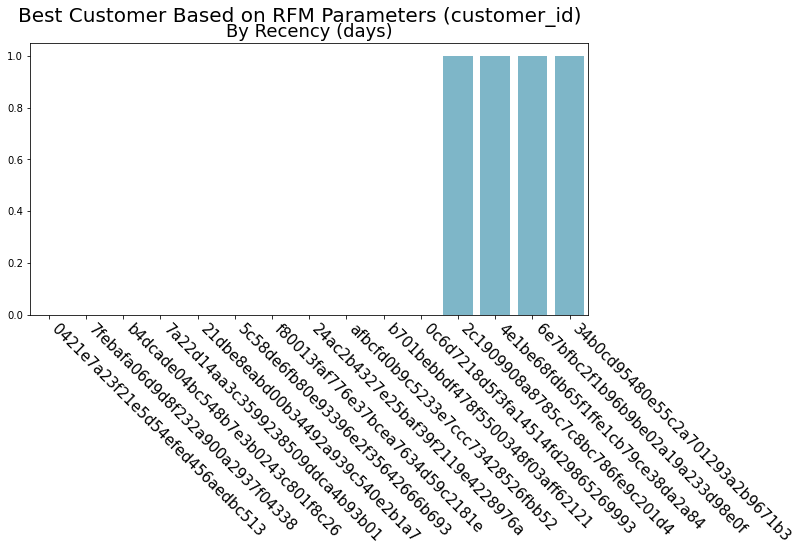

In [156]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(
    y="recency", 
    x="customer_id", 
    data=rfm_df.sort_values(by="recency", ascending=True).head(15), 
    palette=colors)
plt.ylabel(None)
plt.xlabel(None)
plt.title("By Recency (days)", loc="center", fontsize=18)
plt.tick_params(axis ='x', labelsize=15)
plt.xticks(rotation=-45, ha='left')

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

#### Pertanyaan 4. Kapan terakhir pelanggan melakukan transaksi?

12 customer melakukan transaksi dalam 5 hari terakhir dalam beberapa bulan terakhir

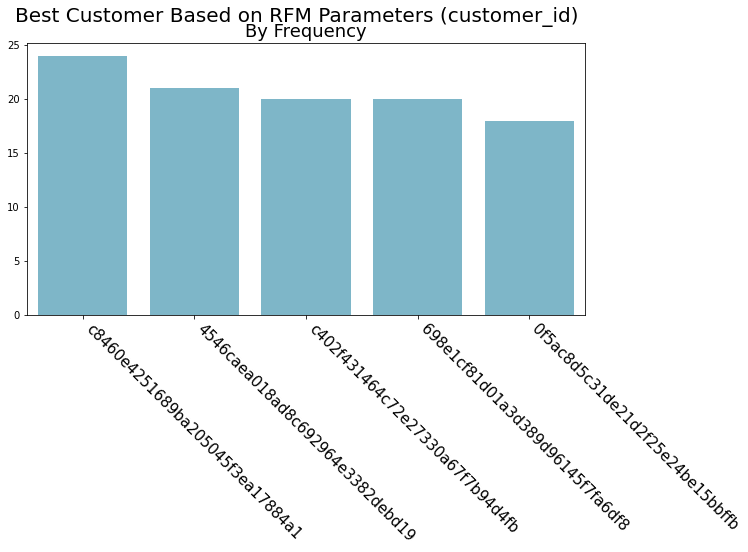

In [157]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]


sns.barplot(
    y="frequency", 
    x="customer_id", 
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5), 
    palette=colors)
plt.ylabel(None)
plt.xlabel(None)
plt.title("By Frequency", loc="center", fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=-45, ha='left')

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

#### Pertanyaan 5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?

4 customer melakukan 20 atau lebih transaksi dalam beberapa bulan terakhir

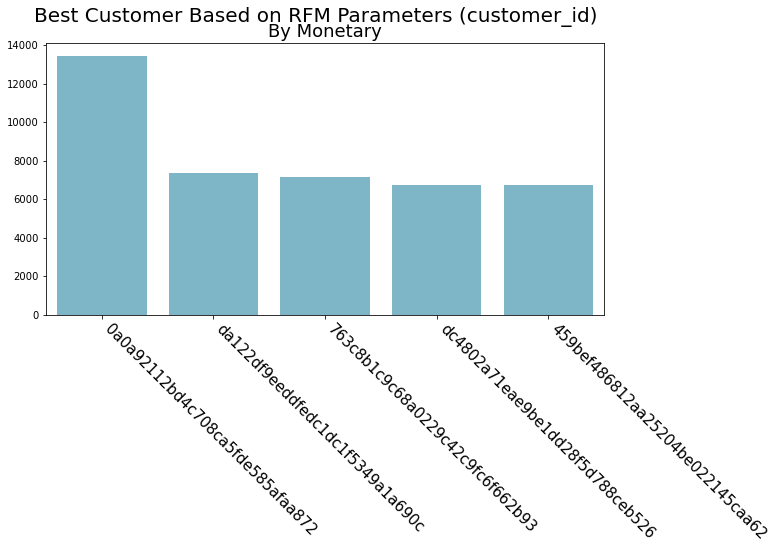

In [158]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="monetary", 
            x="customer_id", 
            data=rfm_df.sort_values(by="monetary", ascending=False).head(5), 
            palette=colors)
plt.ylabel(None)
plt.xlabel(None)
plt.title("By Monetary", loc="center", fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=-45, ha='left')

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

#### Pertanyaan 6. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

1 customer menghabiskan lebih dari 10000 Brazilian Real atau lebih dari 30 juta rupiah dan 6 customer menghabiskan lebih dari 5000 Brazilian Real atau lebih dari 15 juta rupiah dalam beberapa bulan terakhir

In [159]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,111,70924.0,40863.0,63168.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,114,69962.5,40863.0,4088.0
2,0000f46a3911fa3c0805444483337064,1,69.00,537,3227.0,40863.0,36930.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,321,26644.5,40863.0,9406.0
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,288,31326.0,40863.0,75143.0


In [160]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,111,75.997600,43.783819,67.683142
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,114,74.967318,43.783819,4.380203
2,0000f46a3911fa3c0805444483337064,1,69.00,537,3.457846,43.783819,39.569694
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,321,28.550534,43.783819,10.078325
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,288,33.566928,43.783819,80.514095


In [161]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,3.11
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.30
2,0000f46a3911fa3c0805444483337064,1.77
3,0000f6ccb0745a6a4b88665a16c9f078,1.11
4,0004aac84e0df4da2b147fca70cf8255,3.16
5,0004bd2a26a76fe21f786e4fbd80607f,3.25
6,00050ab1314c0e55a6ca13cf7181fecf,1.46


In [162]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,3.11,Medium value customer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.30,lost customers
2,0000f46a3911fa3c0805444483337064,1.77,Low value customers
3,0000f6ccb0745a6a4b88665a16c9f078,1.11,lost customers
4,0004aac84e0df4da2b147fca70cf8255,3.16,Medium value customer
5,0004bd2a26a76fe21f786e4fbd80607f,3.25,Medium value customer
6,00050ab1314c0e55a6ca13cf7181fecf,1.46,lost customers
7,00053a61a98854899e70ed204dd4bafe,4.41,High value customer
8,0005e1862207bf6ccc02e4228effd9a0,2.61,Low value customers
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2.73,Low value customers


In [163]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,3948
1,Low value customers,43536
2,Medium value customer,25585
3,Top customers,1040
4,lost customers,19220


In [164]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])
customer_segment_df

,customer_segment,customer_id
0,High value customer,3948
1,Low value customers,43536
2,Medium value customer,25585
3,Top customers,1040
4,lost customers,19220


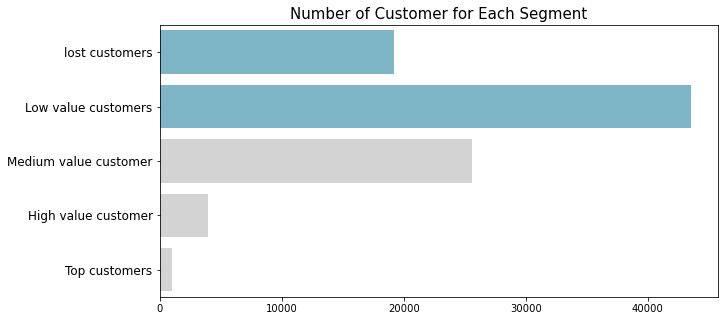

In [165]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

# **Conclusion**

1. Category barang yang paling banyak dan paling sedikit dibeli?

Category paling banyak dibeli adalah bed bath table diikuti oleh health beauty
Category paling sedikit dibeli adalah security and services diikuti oleh fashion childrens clothes

2. Setiap bulan berapa penjualan tertinggi? 

Penjualan tertinggi di bulan agustus diikuti oleh bulan mei. Sedangkan penjualan terendah di bulan september, tepat setelah penjualan tertinggi di bulan agustus

3. Setiap tanggal berapa penjualan tertinggi? (apakah gajian faktor?)

Penjualan tertinggi di tanggal 24, 16, dan 5. Penjualan naik di 3 titik dalam sebulan. yaitu Q1, Q2, dan Q3 di bulan itu

4. Kapan terakhir pelanggan melakukan transaksi?

12 customer melakukan transaksi dalam 5 hari terakhir dalam beberapa bulan terakhir

5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?

4 customer melakukan 20 atau lebih transaksi dalam beberapa bulan terakhir

6. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

1 customer menghabiskan lebih dari 10000 Brazilian Real atau lebih dari 30 juta rupiah dan 6 customer menghabiskan lebih dari 5000 Brazilian Real atau lebih dari 15 juta rupiah dalam beberapa bulan terakhir